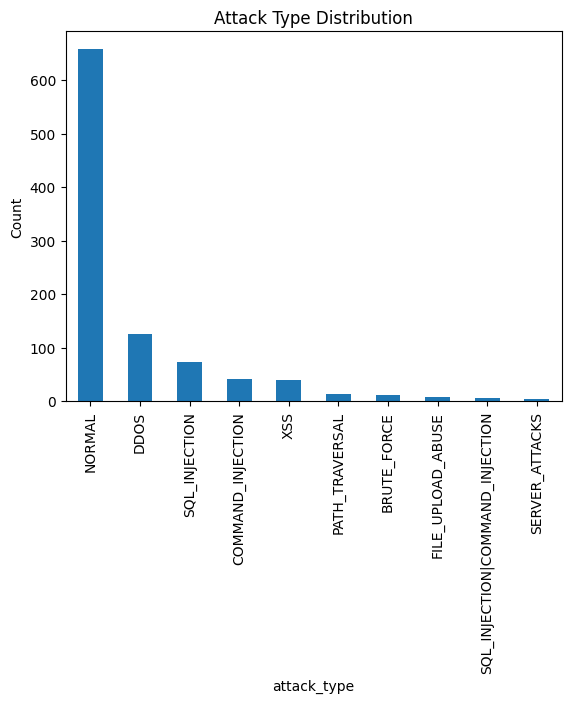

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("traffic_events.csv")

df['attack_type'].value_counts().plot(kind='bar')
plt.title("Attack Type Distribution")
plt.ylabel("Count")
plt.show()



In [20]:
#df.head()
df.tail()

,timestamp,client_ip,method,url,path,attack_type,body_len,body_entropy,special_char_count
976,2026-01-13T09:29:06.637620Z,127.0.0.1:51354,GET,http://192.168.122.170/,/,NORMAL,0,0.000,NaN
977,2026-01-13T09:29:08.800162Z,127.0.0.1:51354,GET,http://192.168.122.170/dvwa/,/dvwa/,NORMAL,0,0.000,NaN
978,2026-01-13T09:29:11.174805Z,127.0.0.1:51354,GET,http://192.168.122.170/dvwa/vulnerabilities/br...,/dvwa/vulnerabilities/brute/,NORMAL,0,0.000,NaN
979,2026-01-13T09:29:13.237567Z,127.0.0.1:51354,GET,http://192.168.122.170/dvwa/vulnerabilities/exec/,/dvwa/vulnerabilities/exec/,NORMAL,0,0.000,NaN
980,2026-01-13T09:29:22.740659Z,127.0.0.1:51354,POST,http://192.168.122.170/dvwa/vulnerabilities/exec/,/dvwa/vulnerabilities/exec/,COMMAND_INJECTION,29,4.047,NaN


In [14]:
df['body_entropy'].value_counts() # BY shannon_entropy function

body_entropy
0.000    900
3.573     24
3.900      7
7.917      4
4.047      3
3.102      3
7.929      3
4.021      2
4.922      2
4.801      2
4.742      2
4.654      2
3.522      1
4.924      1
4.836      1
4.634      1
3.986      1
4.609      1
4.776      1
4.829      1
4.646      1
4.173      1
5.002      1
3.567      1
3.898      1
4.715      1
4.817      1
4.884      1
4.536      1
4.555      1
5.245      1
4.731      1
5.244      1
4.109      1
Name: count, dtype: int64

In [15]:
df['special_char_count'].value_counts()

special_char_count
0.0       97
1.0       23
6112.0     2
6291.0     2
13.0       1
1712.0     1
Name: count, dtype: int64

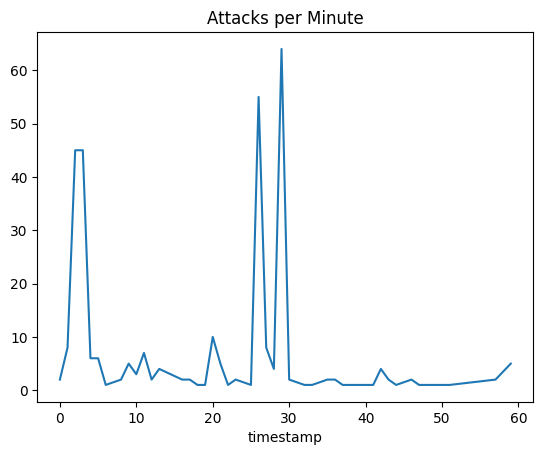

In [16]:

# Attacks over time
df['timestamp'] = pd.to_datetime(df['timestamp'])

attacks = df[df['attack_type'] != "NORMAL"]

attacks.groupby(attacks['timestamp'].dt.minute).size().plot(
    title="Attacks per Minute"
)

plt.show()


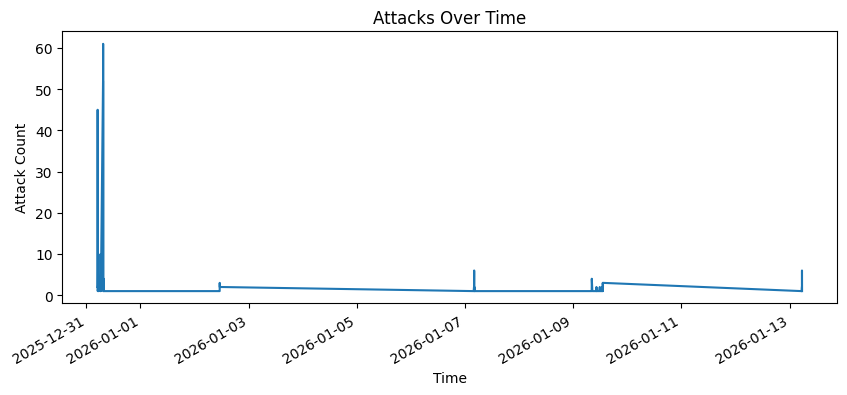

In [17]:
#Attacks Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("traffic_events.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Filter only attacks
attacks = df[df["attack_type"] != "NORMAL"]

# Group by minute and count
counts = attacks.groupby(
    attacks["timestamp"].dt.floor("1min")
).size()

# Plot
plt.figure(figsize=(10, 4))
counts.plot()
plt.xlabel("Time")
plt.ylabel("Attack Count")
plt.title("Attacks Over Time")
plt.show()


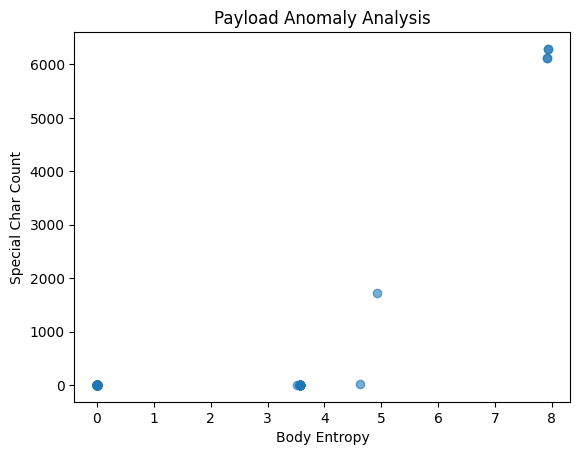

In [18]:
plt.scatter(attacks["body_entropy"],attacks["special_char_count"],alpha=0.6)
plt.xlabel("Body Entropy")
plt.ylabel("Special Char Count")
plt.title("Payload Anomaly Analysis")
plt.show()
